# 1. Import Libraries

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


# 2. Load the Auto MPG Dataset
The classic Auto MPG dataset contains car data with fuel efficiency (mpg) as the target.

In [29]:
# Load dataset from UCI repo or local CSV if available
url = "http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data"

column_names = ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model_year', 'origin', 'car_name']

df = pd.read_csv(url, delim_whitespace=True, names=column_names, na_values='?')

df.head()


C:\Users\yadav\AppData\Local\Temp\ipykernel_13484\617679527.py:6: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(url, delim_whitespace=True, names=column_names, na_values='?')


,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino


# 3. Data Cleaning
Check for missing values and handle them (especially 'horsepower').

In [30]:
# Check missing values
print(df.isnull().sum())

# horsepower has missing values, let's fill them with median
df['horsepower'].fillna(df['horsepower'].median(), inplace=True)

# Confirm no more missing values
print(df.isnull().sum())


mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model_year      0
origin          0
car_name        0
dtype: int64
mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model_year      0
origin          0
car_name        0
dtype: int64


C:\Users\yadav\AppData\Local\Temp\ipykernel_13484\1198007440.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['horsepower'].fillna(df['horsepower'].median(), inplace=True)


# 4. Exploratory Data Analysis (EDA)
Visualize key relationships.

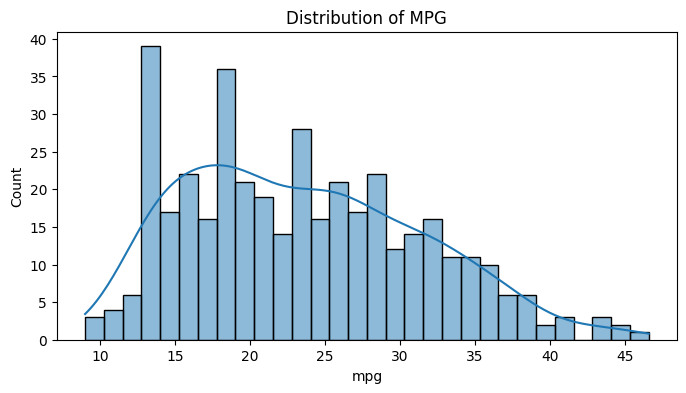

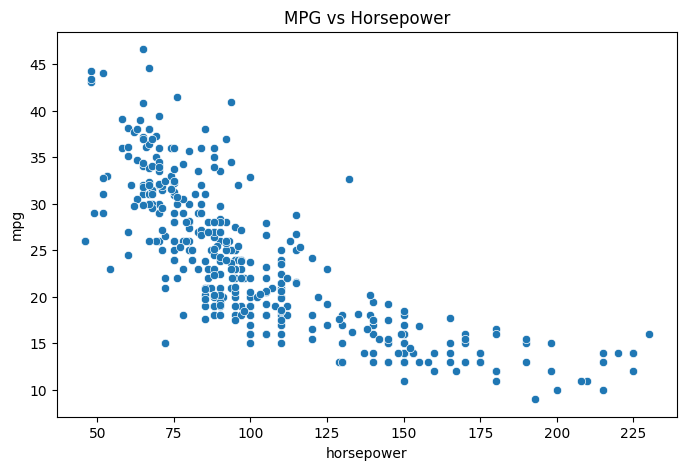

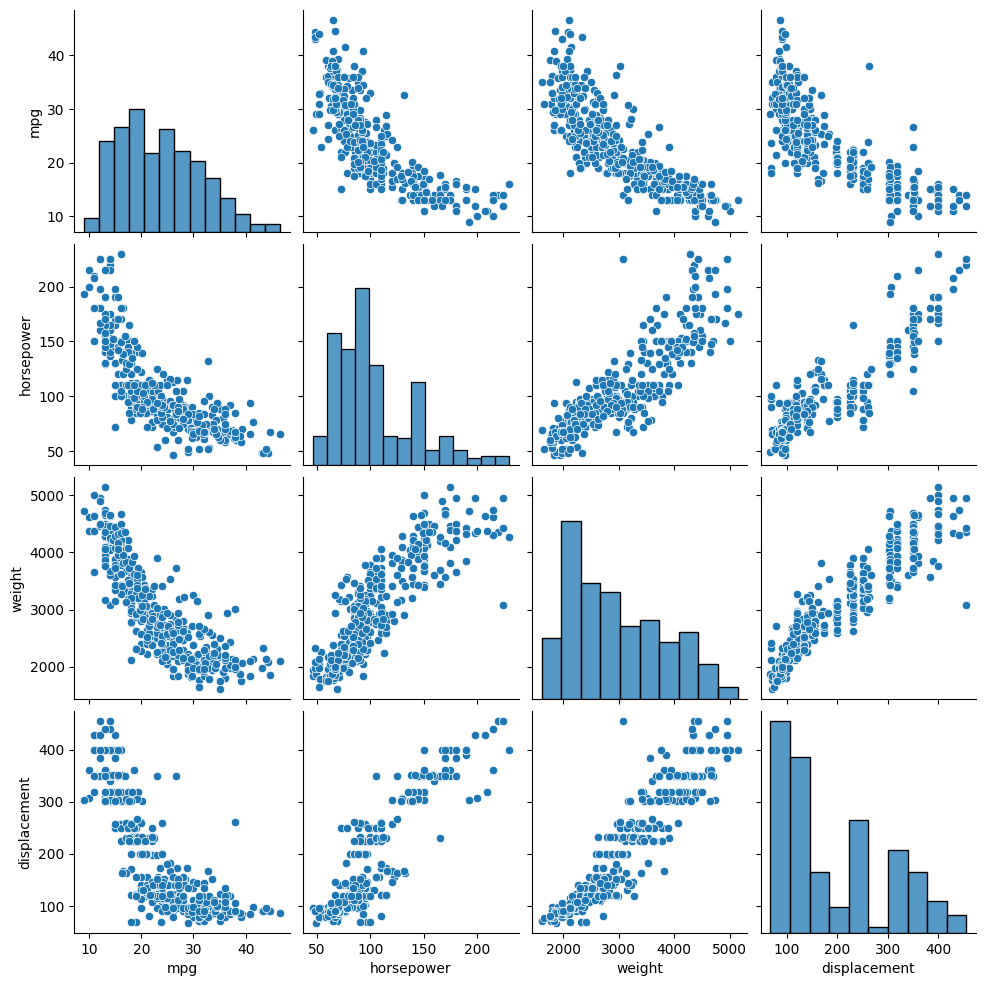

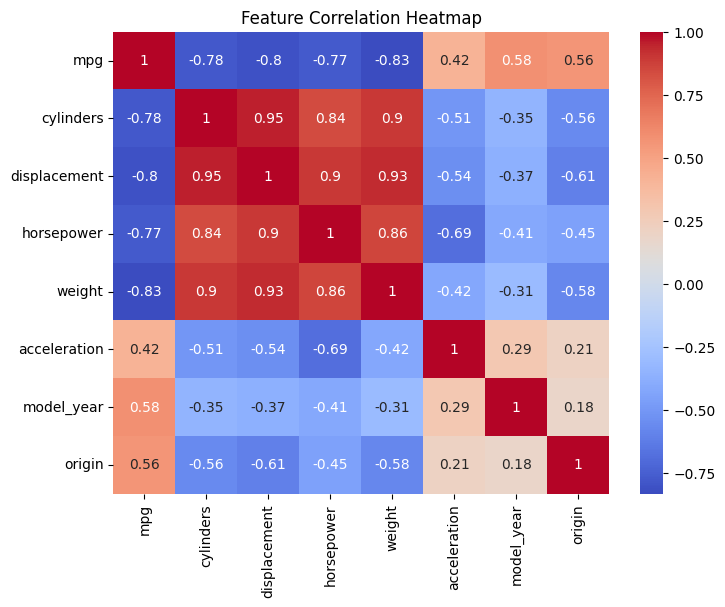

In [33]:
# Distribution of mpg
plt.figure(figsize=(8,4))
sns.histplot(df['mpg'], bins=30, kde=True)
plt.title('Distribution of MPG')
plt.show()

# Scatter plot: mpg vs horsepower
plt.figure(figsize=(8,5))
sns.scatterplot(data=df, x='horsepower', y='mpg')
plt.title('MPG vs Horsepower')
plt.show()

# Pairplot for numerical features
sns.pairplot(df[['mpg', 'horsepower', 'weight', 'displacement']])
plt.show()

# Correlation heatmap
# # Option 1: Drop car_name column before correlation
# df_numeric = df.drop('car_name', axis=1)

# plt.figure(figsize=(8,6))
# sns.heatmap(df_numeric.corr(), annot=True, cmap='coolwarm')
# plt.title('Feature Correlation Heatmap')
# plt.show()


# Option 2: Select only numeric columns automatically
df_numeric = df.select_dtypes(include=[np.number])

plt.figure(figsize=(8,6))
sns.heatmap(df_numeric.corr(), annot=True, cmap='coolwarm')
plt.title('Feature Correlation Heatmap')
plt.show()


# 5. Feature Engineering
Convert categorical columns (e.g. 'origin') into dummy variables

Drop 'car_name' (text, not useful for regression directly)

Prepare feature matrix and target vector


In [ ]:
# Convert 'origin' to categorical dummy variables
df = pd.get_dummies(df, columns=['origin'], prefix='origin')

# Drop car_name as it is textual and not used here
df.drop('car_name', axis=1, inplace=True)

# Define X and y
X = df.drop('mpg', axis=1)
y = df['mpg']


# 6. Train/Test Split

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# 7. Model Training
Let's train 3 models:

Linear Regression

Ridge Regression

Gradient Boosting Regressor

In [36]:
# Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

# Ridge Regression
ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)
y_pred_ridge = ridge.predict(X_test)

# Gradient Boosting Regressor
gbr = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
gbr.fit(X_train, y_train)
y_pred_gbr = gbr.predict(X_test)


# 8. Model Evaluation
Evaluate using MAE, RMSE, and R² score.

In [37]:
def evaluate_model(y_true, y_pred, model_name='Model'):
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    r2 = r2_score(y_true, y_pred)
    
    print(f"{model_name} Performance:")
    print(f"MAE: {mae:.3f}")
    print(f"RMSE: {rmse:.3f}")
    print(f"R²: {r2:.3f}\n")
    
evaluate_model(y_test, y_pred_lr, 'Linear Regression')
evaluate_model(y_test, y_pred_ridge, 'Ridge Regression')
evaluate_model(y_test, y_pred_gbr, 'Gradient Boosting Regressor')


Linear Regression Performance:
MAE: 2.288
RMSE: 2.888
R²: 0.845

Ridge Regression Performance:
MAE: 2.289
RMSE: 2.888
R²: 0.845

Gradient Boosting Regressor Performance:
MAE: 1.786
RMSE: 2.407
R²: 0.892



# 9. Visualizations
Plot predictions vs actual for the best model (say Gradient Boosting):

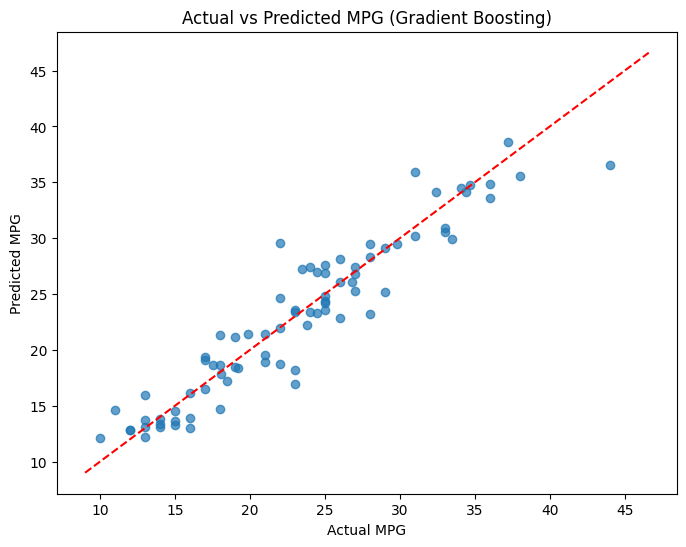

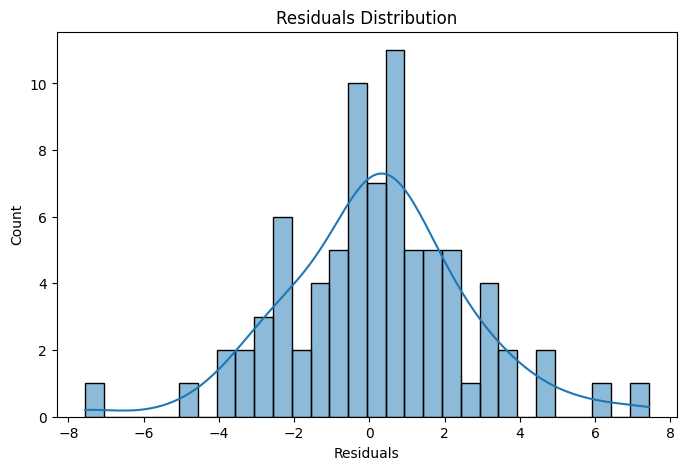

In [38]:
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred_gbr, alpha=0.7)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')  # diagonal line
plt.xlabel('Actual MPG')
plt.ylabel('Predicted MPG')
plt.title('Actual vs Predicted MPG (Gradient Boosting)')
plt.show()

# Residual plot
residuals = y_test - y_pred_gbr
plt.figure(figsize=(8,5))
sns.histplot(residuals, bins=30, kde=True)
plt.title('Residuals Distribution')
plt.xlabel('Residuals')
plt.show()


# Hyperparameter Tuning, Lasso, and Feature Scaling

In [39]:
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV


In [40]:
# 1. Prepare Dataset (with dropping car_name)

df = pd.read_csv(url, delim_whitespace=True, names=column_names, na_values='?')
df['horsepower'].fillna(df['horsepower'].median(), inplace=True)
df.drop('car_name', axis=1, inplace=True)
df = pd.get_dummies(df, columns=['origin'], prefix='origin')

X = df.drop('mpg', axis=1)
y = df['mpg']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


C:\Users\yadav\AppData\Local\Temp\ipykernel_13484\2082065943.py:3: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(url, delim_whitespace=True, names=column_names, na_values='?')
C:\Users\yadav\AppData\Local\Temp\ipykernel_13484\2082065943.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['horsepower'].fillna(df['horsepower'].median(), inplace=True)


# 2. Feature Scaling Setup (StandardScaler)
Scaling is important for models like Ridge and Lasso.

We will create pipelines that first scale features, then fit the model.

Hyperparameter Tuning for Ridge Regression.

In [41]:
ridge_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('ridge', Ridge())
])

ridge_params = {
    'ridge__alpha': np.logspace(-3, 3, 7)  # alphas from 0.001 to 1000
}

ridge_grid = GridSearchCV(ridge_pipeline, ridge_params, cv=5, scoring='neg_mean_squared_error')
ridge_grid.fit(X_train, y_train)

print("Best Ridge alpha:", ridge_grid.best_params_['ridge__alpha'])

# Predict on test
y_pred_ridge_tuned = ridge_grid.predict(X_test)


Best Ridge alpha: 1.0


##  Hyperparameter Tuning for Gradient Boosting

In [42]:
gbr = GradientBoostingRegressor(random_state=42)

gbr_params = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [2, 3, 4]
}

gbr_grid = GridSearchCV(gbr, gbr_params, cv=5, scoring='neg_mean_squared_error')
gbr_grid.fit(X_train, y_train)

print("Best GBR params:", gbr_grid.best_params_)

y_pred_gbr_tuned = gbr_grid.predict(X_test)


Best GBR params: {'learning_rate': 0.1, 'max_depth': 2, 'n_estimators': 100}


##  Lasso Regression (with hyperparameter tuning)

In [43]:
lasso_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('lasso', Lasso(max_iter=10000))
])

lasso_params = {
    'lasso__alpha': np.logspace(-3, 1, 20)
}

lasso_grid = GridSearchCV(lasso_pipeline, lasso_params, cv=5, scoring='neg_mean_squared_error')
lasso_grid.fit(X_train, y_train)

print("Best Lasso alpha:", lasso_grid.best_params_['lasso__alpha'])

y_pred_lasso = lasso_grid.predict(X_test)


Best Lasso alpha: 0.018329807108324356


## Compare Model Performance (with scaling & tuning)

In [44]:
def evaluate_model(y_true, y_pred, model_name):
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    r2 = r2_score(y_true, y_pred)
    print(f"{model_name}:\n MAE: {mae:.3f} | RMSE: {rmse:.3f} | R²: {r2:.3f}\n")
    return mae, rmse, r2

results = {}

results['Ridge Tuned'] = evaluate_model(y_test, y_pred_ridge_tuned, 'Ridge Regression (Tuned)')
results['GBR Tuned'] = evaluate_model(y_test, y_pred_gbr_tuned, 'Gradient Boosting (Tuned)')
results['Lasso Tuned'] = evaluate_model(y_test, y_pred_lasso, 'Lasso Regression (Tuned)')


Ridge Regression (Tuned):
 MAE: 2.284 | RMSE: 2.888 | R²: 0.845

Gradient Boosting (Tuned):
 MAE: 1.827 | RMSE: 2.398 | R²: 0.893

Lasso Regression (Tuned):
 MAE: 2.285 | RMSE: 2.906 | R²: 0.843



## Visualization: Compare Actual vs Predicted for All Models

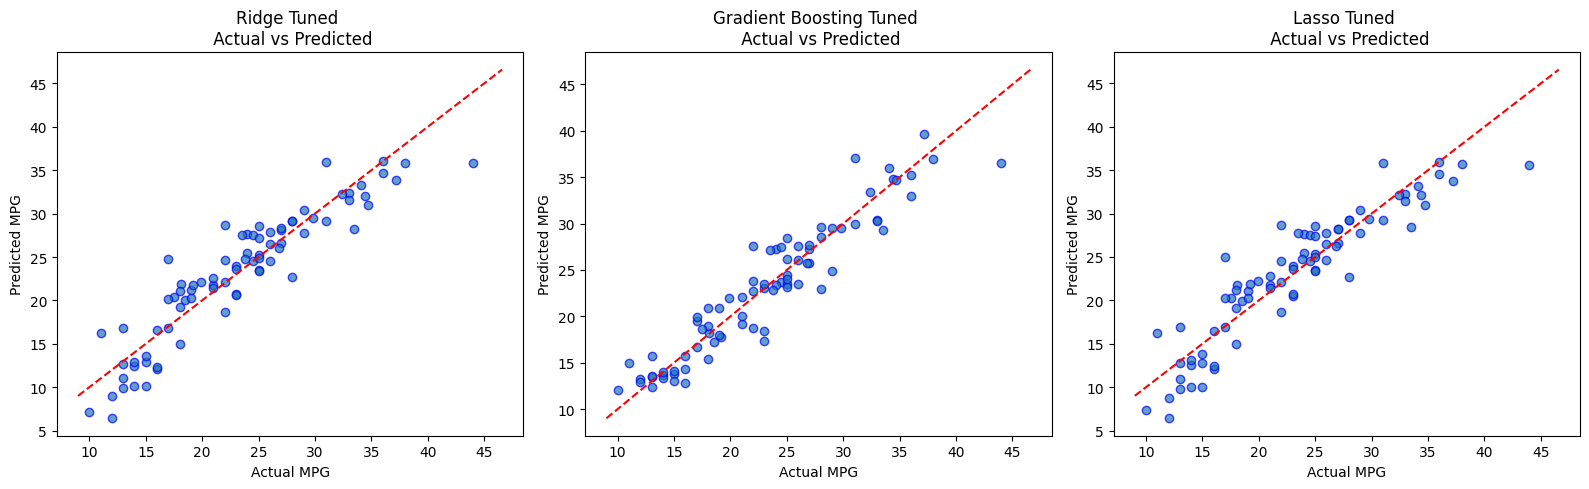

In [45]:
plt.figure(figsize=(16,5))

models = {
    'Ridge Tuned': y_pred_ridge_tuned,
    'Gradient Boosting Tuned': y_pred_gbr_tuned,
    'Lasso Tuned': y_pred_lasso
}

for i, (name, y_pred) in enumerate(models.items(), 1):
    plt.subplot(1, 3, i)
    plt.scatter(y_test, y_pred, alpha=0.7, edgecolors='b')
    plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
    plt.xlabel('Actual MPG')
    plt.ylabel('Predicted MPG')
    plt.title(f'{name} \n Actual vs Predicted')

plt.tight_layout()
plt.show()


## Visualization: Residuals Distribution for Each Model

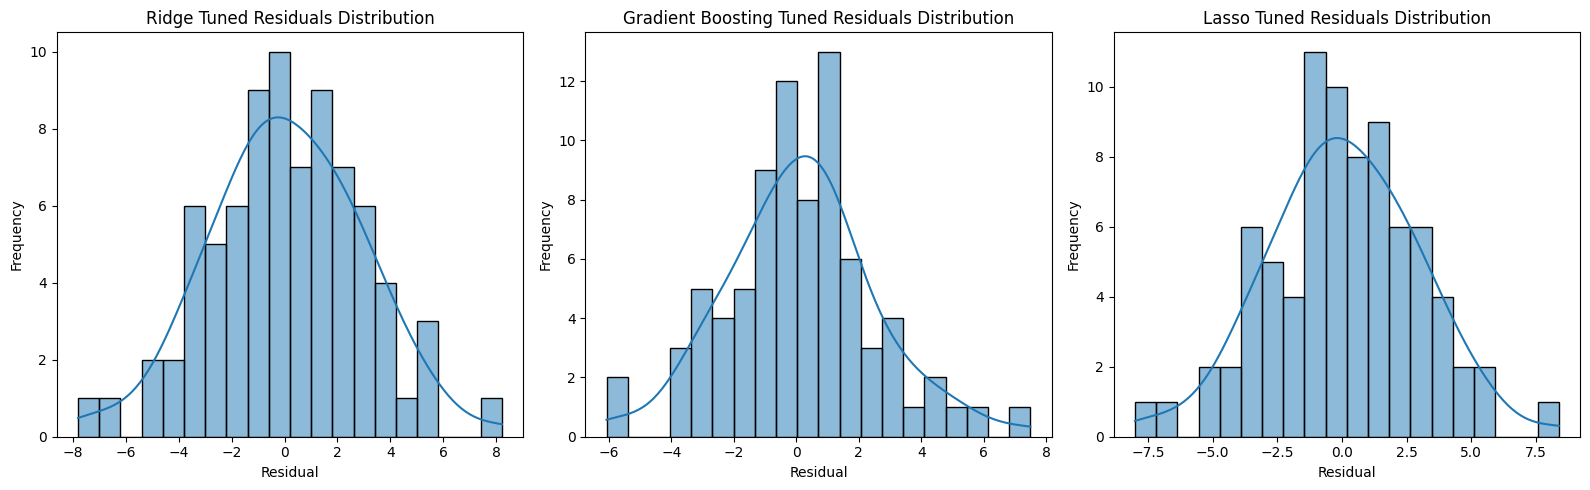

In [46]:
plt.figure(figsize=(16,5))

for i, (name, y_pred) in enumerate(models.items(), 1):
    residuals = y_test - y_pred
    plt.subplot(1, 3, i)
    sns.histplot(residuals, bins=20, kde=True)
    plt.title(f'{name} Residuals Distribution')
    plt.xlabel('Residual')
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


## Impact of Feature Scaling (Visual Insight)
To see the impact of feature scaling, compare Ridge model without scaling vs with scaling:

In [47]:
# Ridge without scaling
ridge_noscale = Ridge(alpha=ridge_grid.best_params_['ridge__alpha'])
ridge_noscale.fit(X_train, y_train)
y_pred_ridge_noscale = ridge_noscale.predict(X_test)

# Evaluate
print("Ridge without scaling:")
evaluate_model(y_test, y_pred_ridge_noscale, 'Ridge Regression (No Scaling)')

print("Ridge with scaling and tuning:")
evaluate_model(y_test, y_pred_ridge_tuned, 'Ridge Regression (With Scaling & Tuning)')


Ridge without scaling:
Ridge Regression (No Scaling):
 MAE: 2.289 | RMSE: 2.888 | R²: 0.845

Ridge with scaling and tuning:
Ridge Regression (With Scaling & Tuning):
 MAE: 2.284 | RMSE: 2.888 | R²: 0.845



(2.2840562395552406, np.float64(2.888208952609659), 0.8448520978489565)

### Visualization: Predicted vs Actual for Ridge with and without scaling

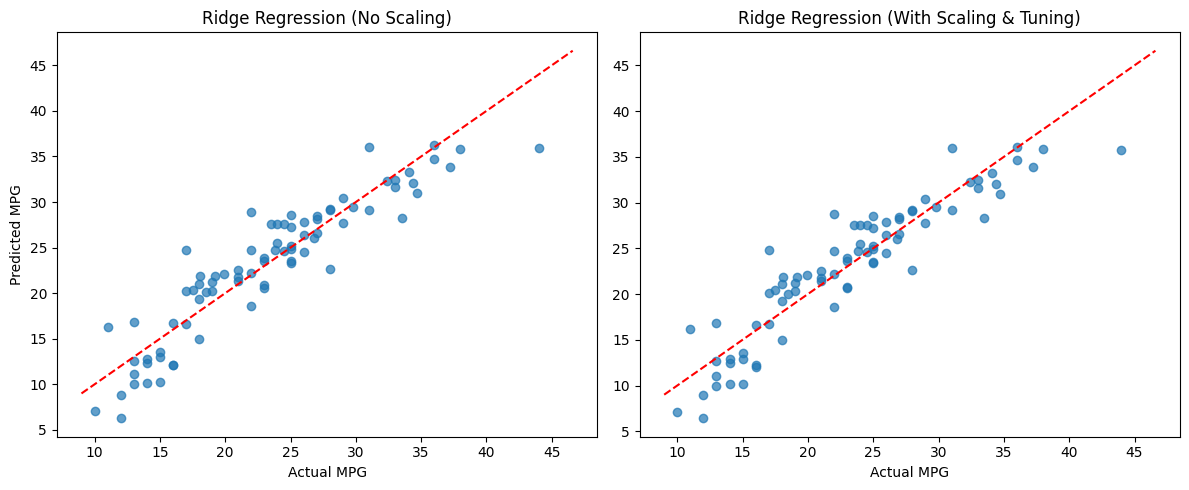

In [48]:
plt.figure(figsize=(12,5))

plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred_ridge_noscale, alpha=0.7)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.title('Ridge Regression (No Scaling)')
plt.xlabel('Actual MPG')
plt.ylabel('Predicted MPG')

plt.subplot(1, 2, 2)
plt.scatter(y_test, y_pred_ridge_tuned, alpha=0.7)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.title('Ridge Regression (With Scaling & Tuning)')
plt.xlabel('Actual MPG')

plt.tight_layout()
plt.show()
